In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [363]:
data = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [364]:
#Note that Rings is the target 

data.shape

(90615, 10)

In [365]:
data = data.set_index('id')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [366]:
data.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [368]:
# data = 
sex = pd.get_dummies(data['Sex'])
data.drop(['Sex'],axis=1,inplace =True)
data = pd.concat([sex,data],axis = 1)

In [369]:
data.head()

,F,I,M,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,,,
0,True,False,False,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,True,False,False,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,False,True,False,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,False,False,True,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,False,True,False,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


<Axes: >

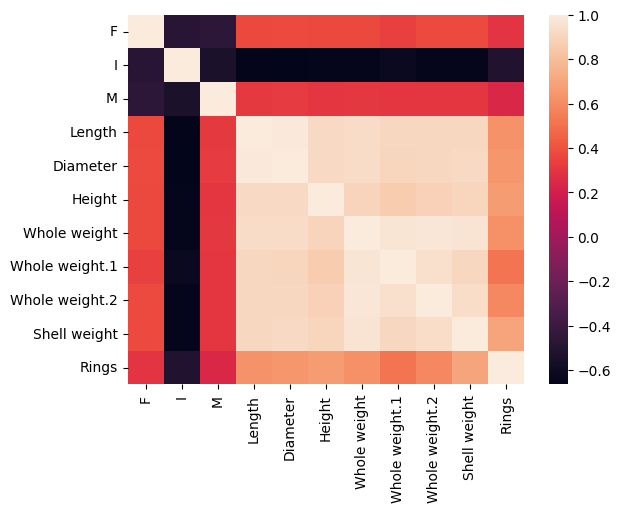

In [370]:
import seaborn as sns

sns.heatmap(data.corr())

In [371]:
# train test split

split = 0.95

train_len = int(len(data)*split)

X, y = data.iloc[:,:-1], data.iloc[:,-1]



Xtrain = X[:train_len]
ytrain = y[:train_len]

Xtest = X[train_len:]
ytest = y[train_len:]


In [372]:
X.head()

,F,I,M,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,,,
0,True,False,False,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,True,False,False,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,False,True,False,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,False,False,True,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,False,True,False,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


In [373]:
y.head()

id
0    11
1    11
2     6
3    10
4     9
Name: Rings, dtype: int64

In [374]:
# Feature normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [375]:
# Convert all arrays to tensors
import torch

Xtrain = torch.tensor(Xtrain, dtype = torch.float32)
Xtest = torch.tensor(Xtest, dtype = torch.float32)


ytrain = torch.tensor(ytrain.values, dtype=torch.float32)
ytest = torch.tensor(ytest.values, dtype=torch.float32)


In [376]:
Xtrain.shape, Xtrain.dtype, Xtest.shape, Xtest.dtype

(torch.Size([86084, 10]), torch.float32, torch.Size([4531, 10]), torch.float32)

In [377]:
ytrain.shape, ytrain.dtype, ytest.shape, ytest.dtype

(torch.Size([86084]), torch.float32, torch.Size([4531]), torch.float32)

In [378]:
Xtrain.shape

torch.Size([86084, 10])

In [379]:
Xtrain.dtype

torch.float32

In [380]:
Xtest

tensor([[-0.6426,  1.3169, -0.7209,  ..., -1.1980, -1.1390, -1.1974],
        [-0.6426, -0.7594,  1.3871,  ...,  1.6136,  1.2302,  1.1067],
        [-0.6426,  1.3169, -0.7209,  ..., -0.8016, -0.6185, -0.6982],
        ...,
        [-0.6426,  1.3169, -0.7209,  ..., -0.9288, -0.9011, -1.1091],
        [-0.6426,  1.3169, -0.7209,  ..., -1.1882, -1.1935, -1.1974],
        [-0.6426,  1.3169, -0.7209,  ..., -0.9215, -0.9011, -0.9286]])

In [382]:
from torch import nn
import torch.nn.functional as F


class MyRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear( in_features = 10, out_features = 512)
        self.fc2 = nn.Linear( in_features = 512, out_features = 256)
        self.fc3 = nn.Linear( in_features = 256, out_features = 128)
        self.fc4 = nn.Linear( in_features = 128, out_features = 1)
        
    def forward(self, x):
        x = F.relu( self.fc1(x))
        x = F.relu( self.fc2(x))
        x = F.relu( self.fc3(x))
        x = self.fc4(x)
        return x
    
model = MyRegressor()
print(model)

MyRegressor(
  (fc1): Linear(in_features=10, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


In [383]:

data =[]

for i in range(len(Xtrain)):
    data.append([Xtrain[i],ytrain[i]])

In [384]:
data[0]

[tensor([ 1.5561, -0.7594, -0.7209,  0.2782,  0.2887,  0.3824, -0.0383, -0.0601,
         -0.2270,  0.1083]),
 tensor(11.)]

In [385]:
# Make the data in DataLoader form and Load the data

data =[]

for i in range(len(Xtrain)):
    data.append([Xtrain[i],ytrain[i]])

    
from torch.utils.data import DataLoader

data_loader = DataLoader(data, batch_size = 32 )


# Testing for demo

for data in data_loader:
    dummyX = data[0]
    dummyY = data[1]
    print(dummyX)
    print(dummyY)
    break

In [386]:
out = model(Xtrain[0])
print(out.shape, ytrain[0].shape)

torch.Size([1]) torch.Size([])


In [387]:
def rmsle(y_true, y_pred):
    """
    Compute the Root Mean Squared Logarithmic Error between two arrays.
    
    Parameters:
    y_true : array-like
        Ground truth values.
    y_pred : array-like
        Predicted values.
    
    Returns:
    rmsle : float
    """
    log_diff = np.log1p(y_pred) - np.log1p(y_true)
    rmsle = np.sqrt(np.mean(log_diff**2))
    return rmsle

In [388]:
# Training 
from sklearn.metrics import r2_score
epochs = 30
lr = 0.01
batch_size = 32

mse = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr)

# Early_stop

val_loss_min = np.inf
stop_cnt = 0
stop_criteria = 8

for ep in range(epochs):
    
    model.train()
    
    for data in data_loader:
        
        opt.zero_grad() # set gradients to 0
        output = model(data[0]) #data[0] is Xtrain_batched 
        
        ytrain_batched = data[1].unsqueeze(1)
        loss = mse(output, ytrain_batched) #data[1] is ytrain_batched
        
        loss.backward()
        opt.step()
        
    print(f" Epoch : {ep}")
    
    with torch.no_grad():
        model.eval()
        
        val_out = model(Xtest)
        
        ytest2 = ytest.unsqueeze(1)
        
        #print(val_out.shape, ytest2.shape)
        
        val_loss = mse(val_out, ytest2)
        
        val_out_numpy = val_out.detach().numpy()  # Convert PyTorch tensor to numpy array
        ytest_numpy = ytest2.detach().numpy()  
        
        score = r2_score(ytest_numpy, val_out_numpy) #Rememebr the sklearn metric args are different
        print(" r2_score : ",score,end=" , ")
         
        if val_loss < val_loss_min:
            print(f" val Loss Decreased {val_loss_min} -> {val_loss}", end= " , ")
            stop_cnt = 0
            torch.save(model.state_dict(),"state_dict.pth")
            val_loss_min = val_loss
        else:
            print(f" val Loss is same")
            stop_cnt += 1 
        if stop_cnt >= stop_criteria:
            print(" Early stopping")
            break
    print(f" Best Val loss : {val_loss_min} ")

 Epoch : 0
 r2_score :  0.6195497619660799 ,  val Loss Decreased inf -> 3.8569672107696533 ,  Best Val loss : 3.8569672107696533 
 Epoch : 1
 r2_score :  0.6329252998450743 ,  val Loss Decreased 3.8569672107696533 -> 3.7213668823242188 ,  Best Val loss : 3.7213668823242188 
 Epoch : 2
 r2_score :  0.6390867347291466 ,  val Loss Decreased 3.7213668823242188 -> 3.658903121948242 ,  Best Val loss : 3.658903121948242 
 Epoch : 3
 r2_score :  0.6401449091636695 ,  val Loss Decreased 3.658903121948242 -> 3.6481754779815674 ,  Best Val loss : 3.6481754779815674 
 Epoch : 4
 r2_score :  0.6396516236743985 ,  val Loss is same
 Best Val loss : 3.6481754779815674 
 Epoch : 5
 r2_score :  0.6406783802838526 ,  val Loss Decreased 3.6481754779815674 -> 3.6427669525146484 ,  Best Val loss : 3.6427669525146484 
 Epoch : 6
 r2_score :  0.6392301662418898 ,  val Loss is same
 Best Val loss : 3.6427669525146484 
 Epoch : 7
 r2_score :  0.6400983502734467 ,  val Loss is same
 Best Val loss : 3.64276695251

# Preparing Test Data

In [395]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')
test_data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [396]:
test_data = test_data.set_index('id')
sex = pd.get_dummies(test_data['Sex'])
test_data.drop(['Sex'],axis=1,inplace =True)
test_data = pd.concat([sex,test_data],axis = 1)

In [397]:
test_data.head()

,F,I,M,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,,,
90615,False,False,True,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
90616,False,False,True,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
90617,False,False,True,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
90618,False,False,True,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
90619,False,True,False,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [398]:
test_data = scaler.transform(test_data)
test_data = torch.tensor(test_data, dtype = torch.float32)

In [400]:
test_data.shape, test_data.dtype

(torch.Size([60411, 10]), torch.float32)

In [401]:
test_model = MyRegressor()
print(test_model)

test_model.load_state_dict(torch.load('state_dict.pth'))

test_model.eval()    

MyRegressor(
  (fc1): Linear(in_features=10, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


MyRegressor(
  (fc1): Linear(in_features=10, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)

In [402]:
test_batch_size = 100

test_model.eval()

test_data_loader = DataLoader(test_data, batch_size =  test_batch_size )

finalY = []

for data in test_data_loader:
    
    out = test_model(data)
    
    finalY.append(out)
finalY = torch.cat(finalY, dim=0)

In [403]:
finalY.shape

torch.Size([60411, 1])

In [404]:
finalY[0]

tensor([9.5670], grad_fn=<SelectBackward0>)

In [406]:
Y = finalY.detach().round().numpy() # make the values  rounded to closest integer

In [409]:
Y.shape

(60411, 1)

In [413]:
Y

array([[10.],
       [10.],
       [10.],
       ...,
       [12.],
       [13.],
       [ 8.]], dtype=float32)

In [411]:
df = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

final_df = df['id']
# final_df['Rings'] = Y

final_df.head()

0    90615
1    90616
2    90617
3    90618
4    90619
Name: id, dtype: int64

In [414]:
final_df = pd.DataFrame({"id":final_df})

In [416]:
final_df.head()

,id
0,90615
1,90616
2,90617
3,90618
4,90619


In [417]:
final_df['Rings'] = Y
final_df.head()

,id,Rings
0,90615,10.0
1,90616,10.0
2,90617,10.0
3,90618,10.0
4,90619,7.0


In [419]:
final_df.to_csv('output.csv', index = False)

In [420]:
# Recheck the shape of resultant CSV

garb = pd.read_csv('/kaggle/working/output.csv')
garb.shape

(60411, 2)